In [1]:
import tensorflow as tf
import json
from tensorflow import keras
import numpy as np
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
tf.__version__

c:\Users\maky\.conda\envs\tote-checker\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.10.0'

In [2]:
with open('imagenet_classes.json') as json_file:
    imagenet_classes = json.load(json_file)
    imagenet_classes = {int(k):v for k,v in imagenet_classes.items()}

In [3]:
vgg19_model=tf.keras.applications.vgg19.VGG19(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [75]:
def visualize_weights(layer_name, layer_weights, bias = None, plot_square_no = None):
    f_min, f_max = layer_weights.min(), layer_weights.max()
    filters = (layer_weights - f_min) / (f_max - f_min)
    layer_weights_shape = layer_weights.shape

    num_features = layer_weights.shape[-1]
    square_dim = int(np.ceil(np.sqrt(num_features)))
    if plot_square_no is not None and plot_square_no <= layer_weights_shape[-1] and  plot_square_no <=layer_weights_shape[-2] :
        square_dim = plot_square_no
    else:
        square_dim = min(layer_weights.shape[-1:-3:-1])


    fig, ax = plt.subplots(square_dim, square_dim, figsize=(10, 10))
    fig.suptitle(f"{layer_name}: shape ({layer_weights.shape})", fontsize=16)

    for i in range(square_dim):
        for j in range(square_dim):
            index = i * square_dim + j
            if index < num_features:
                ax[i, j].imshow(filters[:, :, i, j], cmap='gray')
                ax[i, j].axis('off')
                ax[i, j].set_title(f'Weights for ({i},{j})')

    plt.tight_layout()
    plt.show()

In [50]:
def visualize_features(layer_name, feature_maps, bias = None, plot_square_no = None):
    num_features = feature_maps.shape[-1]
    square_dim = int(np.ceil(np.sqrt(num_features)))
    if plot_square_no is not None:
        square_dim = plot_square_no

    fig, ax = plt.subplots(square_dim, square_dim, figsize=(10, 10))
    fig.suptitle(layer_name, fontsize=16)

    for i in range(square_dim):
        for j in range(square_dim):
            index = i * square_dim + j
            if index < num_features:
                ax[i, j].imshow(feature_maps[0, :, :, index], cmap='gray')
                ax[i, j].axis('off')
                if bias is not None:
                    ax[i, j].set_title('Bias: {:.2f}'.format(float(bias[index])))

    plt.tight_layout()
    plt.show()

In [5]:
img_path = 'elephant.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = vgg19_model.predict(x)
class_index = np.argmax(features)
print(class_index)
print("We have a",imagenet_classes[class_index])


1/1 [==============================] - 0s 470ms/step
101
We have a tusker


In [6]:
for layer in vgg19_model.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
flatten
fc1
fc2
predictions


1/1 [==============================] - 0s 49ms/step


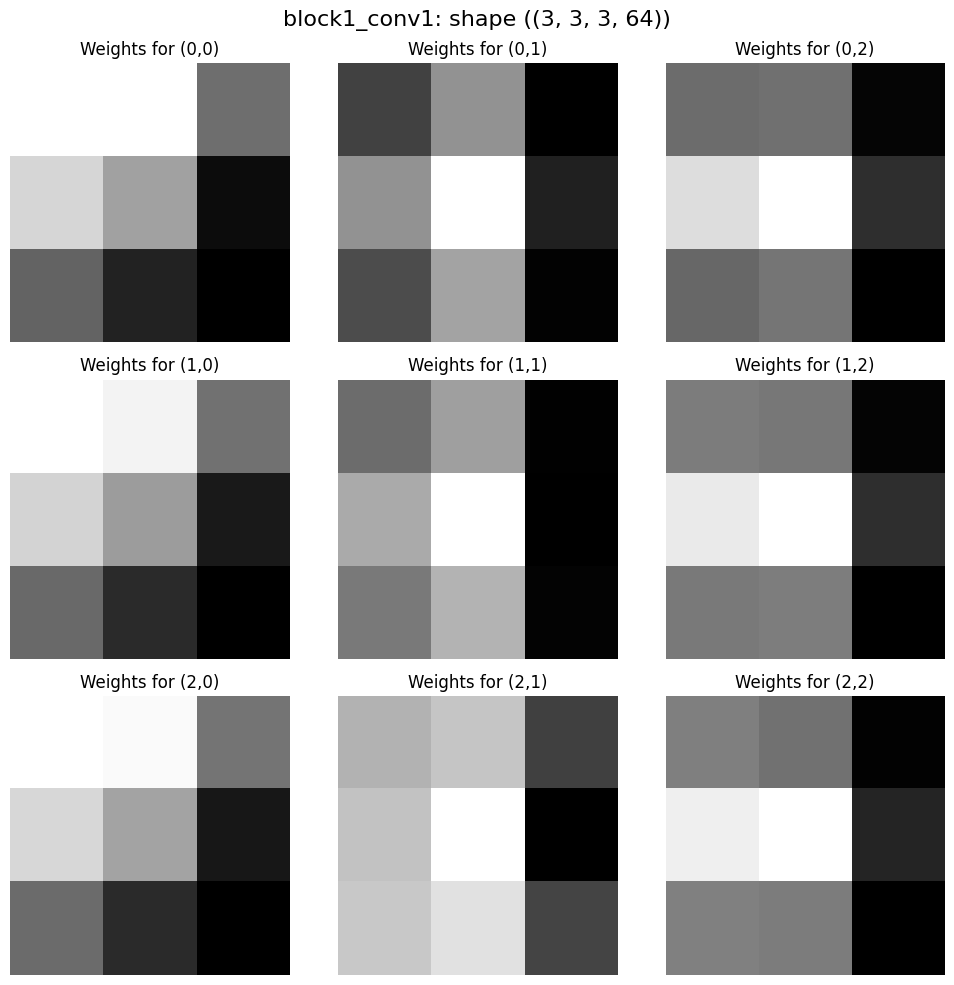

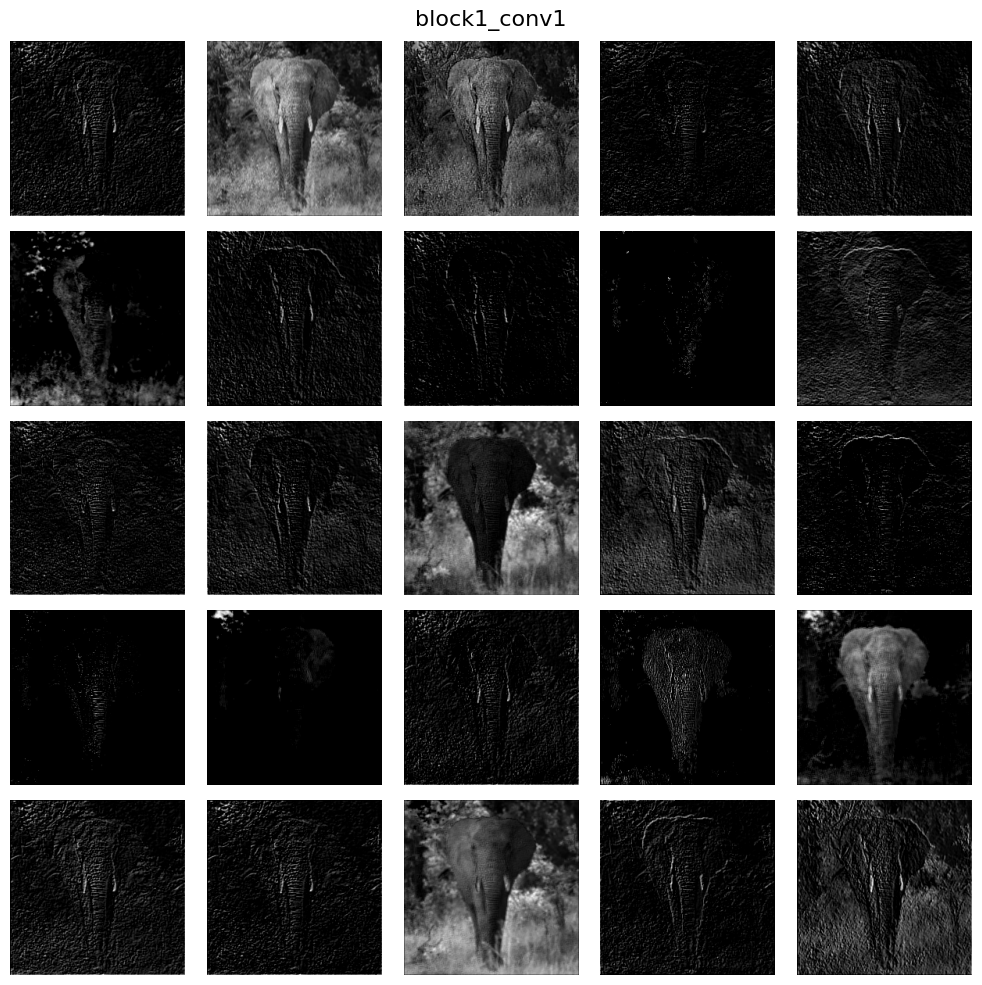

In [76]:
for layer in vgg19_model.layers:
    layer_name = layer.name
    if layer_name != "block1_conv1":
        continue
    intermediate_model = Model(inputs=vgg19_model.input, outputs=layer.output)
    features = intermediate_model.predict(np.expand_dims(img, axis=0))  # Replace 'image' with your input data
    layer_weights = layer.get_weights()[0] # weight
    layer_bias = layer.get_weights()[1] # bias

    # if "conv" in layer_name:
    #     features_tensor = tf.constant(features)
    #     weights_tensor = tf.constant(layer_weights)
    #     biases_tensor = tf.constant(layer_bias)
    #     # Perform convolution using tf.nn.conv2d
    #     convolved_features = tf.nn.conv2d(
    #         input=features_tensor,
    #         filters=weights_tensor,
    #         strides=[1, 1, 1, 1],
    #         padding='SAME'
    #     )
    #     convolved_features_with_bias = tf.nn.bias_add(convolved_features, biases_tensor)
    #     next_layer_input = convolved_features_with_bias
    #     activation_function = layer.activation.__name__
    #     if activation_function == "relu":
    #         activated_features = tf.nn.relu(convolved_features_with_bias)
    #         activated_features_array = activated_features.numpy()
    

    visualize_weights(layer_name,layer_weights, plot_square_no=5)
    visualize_features(layer_name, features, plot_square_no=5)
    break